# **Cyclistic: Google Capstone Project with Python**

# Introduction:

Welcome to the Cyclistic bike-share analysis case study! Cyclistic is a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, the team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, the team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives
must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

# Characters and Teams:

* **Cyclistic:** A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day.

* **Lily Moreno:** The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels.

* **Cyclistic marketing analytics team:** A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy learning about Cyclistic’s mission and business goals — as well as how you, as a junior data analyst, can help Cyclistic achieve them.

* **Cyclistic executive team:** The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.


# About the company:

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.
Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. 

Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers
who purchase annual memberships are Cyclistic members. Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the
pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs. 

Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.

# Business Task:
**Understanding the nature of bike usage between annual members & casual members and to introduce strategy to increase the number of annual memberships.**

# Data Preparation

**Import Libraries**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Import Datasets**

In [2]:
tripdata_2020_04 = pd.read_csv('../input/cyclistic/202004-divvy-tripdata/202004-divvy-tripdata.csv')
tripdata_2020_05 = pd.read_csv('../input/cyclistic/202005-divvy-tripdata/202005-divvy-tripdata.csv')
tripdata_2020_06 = pd.read_csv('../input/cyclistic/202006-divvy-tripdata/202006-divvy-tripdata.csv')
tripdata_2020_07 = pd.read_csv('../input/cyclistic/202007-divvy-tripdata/202007-divvy-tripdata.csv')
tripdata_2020_08 = pd.read_csv('../input/cyclistic/202008-divvy-tripdata/202008-divvy-tripdata.csv')
tripdata_2020_09 = pd.read_csv('../input/cyclistic/202009-divvy-tripdata/202009-divvy-tripdata.csv')
tripdata_2020_10 = pd.read_csv('../input/cyclistic/202010-divvy-tripdata/202010-divvy-tripdata.csv')
tripdata_2020_11 = pd.read_csv('../input/cyclistic/202011-divvy-tripdata/202011-divvy-tripdata.csv')
tripdata_2020_12 = pd.read_csv('../input/cyclistic/202012-divvy-tripdata/202012-divvy-tripdata.csv')
tripdata_2021_01 = pd.read_csv('../input/cyclistic/202101-divvy-tripdata/202101-divvy-tripdata.csv')
tripdata_2021_02 = pd.read_csv('../input/cyclistic/202102-divvy-tripdata/202102-divvy-tripdata.csv')
tripdata_2021_03 = pd.read_csv('../input/cyclistic/202103-divvy-tripdata/202103-divvy-tripdata.csv')

In [3]:
tripdata_2020_04.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member


In [4]:
tripdata_2020_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84776 entries, 0 to 84775
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             84776 non-null  object 
 1   rideable_type       84776 non-null  object 
 2   started_at          84776 non-null  object 
 3   ended_at            84776 non-null  object 
 4   start_station_name  84776 non-null  object 
 5   start_station_id    84776 non-null  int64  
 6   end_station_name    84677 non-null  object 
 7   end_station_id      84677 non-null  float64
 8   start_lat           84776 non-null  float64
 9   start_lng           84776 non-null  float64
 10  end_lat             84677 non-null  float64
 11  end_lng             84677 non-null  float64
 12  member_casual       84776 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 8.4+ MB


In [5]:
tripdata_2021_03.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,CFA86D4455AA1030,classic_bike,2021-03-16 08:32:30,2021-03-16 08:36:34,Humboldt Blvd & Armitage Ave,15651,Stave St & Armitage Ave,13266,41.917513,-87.701809,41.917741,-87.691392,casual
1,30D9DC61227D1AF3,classic_bike,2021-03-28 01:26:28,2021-03-28 01:36:55,Humboldt Blvd & Armitage Ave,15651,Central Park Ave & Bloomingdale Ave,18017,41.917513,-87.701809,41.914166,-87.716755,casual
2,846D87A15682A284,classic_bike,2021-03-11 21:17:29,2021-03-11 21:33:53,Shields Ave & 28th Pl,15443,Halsted St & 35th St,TA1308000043,41.842733,-87.635491,41.830661,-87.647172,casual


In [6]:
tripdata_2021_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228496 entries, 0 to 228495
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             228496 non-null  object 
 1   rideable_type       228496 non-null  object 
 2   started_at          228496 non-null  object 
 3   ended_at            228496 non-null  object 
 4   start_station_name  213648 non-null  object 
 5   start_station_id    213648 non-null  object 
 6   end_station_name    211769 non-null  object 
 7   end_station_id      211769 non-null  object 
 8   start_lat           228496 non-null  float64
 9   start_lng           228496 non-null  float64
 10  end_lat             228329 non-null  float64
 11  end_lng             228329 non-null  float64
 12  member_casual       228496 non-null  object 
dtypes: float64(4), object(9)
memory usage: 22.7+ MB


In Datasets tripdata_2020_04 to tripdata_2020_11, the Data type of 'start_station_id' and 'end_station_id' is not 'object'. We need to first concat these datasets and then collectively change the data type of these columns.

In [7]:
df = pd.concat([tripdata_2020_04, tripdata_2020_05, tripdata_2020_06, tripdata_2020_07, tripdata_2020_08, tripdata_2020_09, tripdata_2020_10,tripdata_2020_11])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2983223 entries, 0 to 259715
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    float64
 6   end_station_name    object 
 7   end_station_id      float64
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(6), object(7)
memory usage: 318.6+ MB


In [9]:
df['start_station_id'] = df['start_station_id'].apply(str)
df['end_station_id'] = df['start_station_id'].apply(str)

In [10]:
df['start_station_id'].dtype
df['end_station_id'].dtype

dtype('O')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2983223 entries, 0 to 259715
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 318.6+ MB


Now, let's concat all the datasets into one single dataset.

In [12]:
bike_share = pd.concat([df, tripdata_2020_12, tripdata_2021_01, tripdata_2021_02, tripdata_2021_03])

In [13]:
bike_share.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86.0,Lincoln Ave & Diversey Pkwy,86.0,41.8964,-87.6610,41.9322,-87.6586,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503.0,Kosciuszko Park,503.0,41.9244,-87.7154,41.9306,-87.7238,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142.0,Indiana Ave & Roosevelt Rd,142.0,41.8945,-87.6179,41.8679,-87.6230,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216.0,Wood St & Augusta Blvd,216.0,41.9030,-87.6975,41.8992,-87.6722,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125.0,Sheridan Rd & Lawrence Ave,125.0,41.8902,-87.6262,41.9695,-87.6547,casual


In [14]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3489748 entries, 0 to 228495
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 372.7+ MB


# Data Processing

We will look for the null values and duplicates in the dataset to remove them.

In [15]:
bike_share.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    122175
start_station_id       39218
end_station_name      143242
end_station_id         45599
start_lat                  0
start_lng                  0
end_lat                 4738
end_lng                 4738
member_casual              0
dtype: int64

In [16]:
bike_share.shape

(3489748, 13)

In [17]:
(bike_share.isna().sum()/3489748) * 100

ride_id               0.000000
rideable_type         0.000000
started_at            0.000000
ended_at              0.000000
start_station_name    3.500969
start_station_id      1.123806
end_station_name      4.104652
end_station_id        1.306656
start_lat             0.000000
start_lng             0.000000
end_lat               0.135769
end_lng               0.135769
member_casual         0.000000
dtype: float64

The missing values are less than 5%. We can remove them and continue with our analysis.

In [18]:
bike_share.dropna(axis=0, inplace=True)

In [19]:
bike_share.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [20]:
bike_share[bike_share.duplicated()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


Let's convert columns 'started_at' and 'ended_at' to 'datetime' Datatype.

In [21]:
bike_share['started_at'] = pd.to_datetime(bike_share['started_at'], dayfirst = True)
bike_share['ended_at'] = pd.to_datetime(bike_share['ended_at'], dayfirst = True)

In [22]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3295563 entries, 0 to 228494
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 352.0+ MB


Now, we will start creating new columns for 'Hour', 'Day' and 'Month'.

In [23]:
bike_share['Hour'] = bike_share.started_at.apply(lambda x: x.hour)

In [24]:
bike_share['Day'] = bike_share.started_at.apply(lambda x: x.day_name())  

In [25]:
bike_share['Month'] = bike_share.started_at.apply(lambda x: x.month)

In [26]:
bike_share.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Hour,Day,Month
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86.0,Lincoln Ave & Diversey Pkwy,86.0,41.8964,-87.6610,41.9322,-87.6586,member,17,Sunday,4
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503.0,Kosciuszko Park,503.0,41.9244,-87.7154,41.9306,-87.7238,member,17,Friday,4
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142.0,Indiana Ave & Roosevelt Rd,142.0,41.8945,-87.6179,41.8679,-87.6230,member,17,Wednesday,4
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216.0,Wood St & Augusta Blvd,216.0,41.9030,-87.6975,41.8992,-87.6722,member,12,Tuesday,4
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125.0,Sheridan Rd & Lawrence Ave,125.0,41.8902,-87.6262,41.9695,-87.6547,casual,10,Saturday,4


Let's calculate 'Total_Ride_Time' in minutes.

In [27]:
import datetime as datetime
from datetime import timedelta

In [28]:
bike_share['Total_Ride_Time'] = (bike_share['ended_at'] - bike_share['started_at'])

In [29]:
bike_share['Total_Ride_Time'] = (bike_share['Total_Ride_Time'])/timedelta(minutes=1)

In [30]:
bike_share['Total_Ride_Time'] = bike_share['Total_Ride_Time'].round(decimals = 1)

In [31]:
bike_share.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Hour,Day,Month,Total_Ride_Time
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86.0,Lincoln Ave & Diversey Pkwy,86.0,41.8964,-87.6610,41.9322,-87.6586,member,17,Sunday,4,26.8
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503.0,Kosciuszko Park,503.0,41.9244,-87.7154,41.9306,-87.7238,member,17,Friday,4,8.2
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142.0,Indiana Ave & Roosevelt Rd,142.0,41.8945,-87.6179,41.8679,-87.6230,member,17,Wednesday,4,14.4
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216.0,Wood St & Augusta Blvd,216.0,41.9030,-87.6975,41.8992,-87.6722,member,12,Tuesday,4,12.2
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125.0,Sheridan Rd & Lawrence Ave,125.0,41.8902,-87.6262,41.9695,-87.6547,casual,10,Saturday,4,52.9


Let's calculate the ride distance in Kms from given coordinates.

In [32]:
bike_share['Lat'] = (bike_share['end_lat'] - bike_share['start_lat'])

In [33]:
bike_share['Lng'] = (bike_share['end_lng']) - bike_share['start_lng']

In [34]:
import math

In [35]:
bike_share['Distance'] = np.sqrt((bike_share['Lat']** 2) + (bike_share['Lng'] ** 2))

In [36]:
bike_share['Distance'] = bike_share['Distance'] * 111

In [37]:
bike_share['Distance'].head()

0    3.982720
1    1.158874
2    3.006379
3    2.839800
4    9.353514
Name: Distance, dtype: float64

In [38]:
bike_share['Distance'] = bike_share['Distance'].round(decimals = 2)

In [39]:
bike_share.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Hour,Day,Month,Total_Ride_Time,Lat,Lng,Distance
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86.0,Lincoln Ave & Diversey Pkwy,86.0,41.8964,-87.6610,41.9322,-87.6586,member,17,Sunday,4,26.8,0.0358,0.0024,3.98
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503.0,Kosciuszko Park,503.0,41.9244,-87.7154,41.9306,-87.7238,member,17,Friday,4,8.2,0.0062,-0.0084,1.16
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142.0,Indiana Ave & Roosevelt Rd,142.0,41.8945,-87.6179,41.8679,-87.6230,member,17,Wednesday,4,14.4,-0.0266,-0.0051,3.01
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216.0,Wood St & Augusta Blvd,216.0,41.9030,-87.6975,41.8992,-87.6722,member,12,Tuesday,4,12.2,-0.0038,0.0253,2.84
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125.0,Sheridan Rd & Lawrence Ave,125.0,41.8902,-87.6262,41.9695,-87.6547,casual,10,Saturday,4,52.9,0.0793,-0.0285,9.35


In [40]:
month = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}

In [41]:
bike_share['Month_Name'] = bike_share['Month'].map(month)

In [42]:
bike_share['Month_Name'].head()

0    April
1    April
2    April
3    April
4    April
Name: Month_Name, dtype: object

# Data Analysis and Visualization

In [43]:
sns.set_style('whitegrid')

In [44]:
bike_share.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,Hour,Day,Month,Total_Ride_Time,Lat,Lng,Distance,Month_Name
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86.0,Lincoln Ave & Diversey Pkwy,86.0,41.8964,-87.6610,...,-87.6586,member,17,Sunday,4,26.8,0.0358,0.0024,3.98,April
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503.0,Kosciuszko Park,503.0,41.9244,-87.7154,...,-87.7238,member,17,Friday,4,8.2,0.0062,-0.0084,1.16,April
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142.0,Indiana Ave & Roosevelt Rd,142.0,41.8945,-87.6179,...,-87.6230,member,17,Wednesday,4,14.4,-0.0266,-0.0051,3.01,April


<AxesSubplot:xlabel='member_casual', ylabel='Distance'>

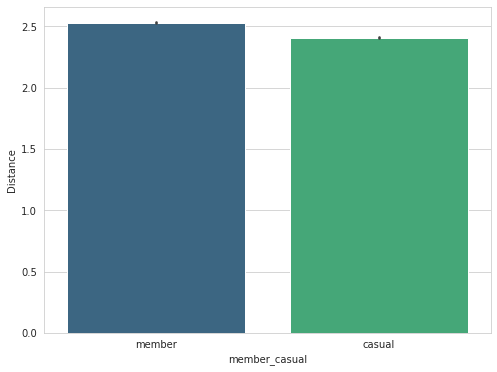

In [45]:
plt.figure(figsize=(8,6))
sns.barplot(x='member_casual', y='Distance', data=bike_share, palette='viridis')

<AxesSubplot:xlabel='member_casual', ylabel='Total_Ride_Time'>

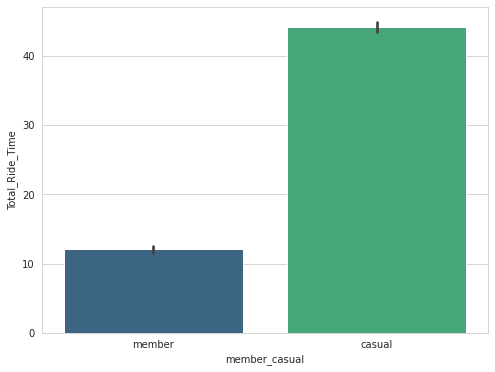

In [46]:
plt.figure(figsize=(8,6))
sns.barplot(x='member_casual', y='Total_Ride_Time', data=bike_share, palette='viridis')

* In the first plot, we observe that the member riders have travelled longer distance than the casual riders.  However the second plot for 'Total Ride Time' shows casual bikers have more ride time than the member bikers.

* We can conclude from the above observations that member riders have short journeys compared to casual ones. Their travel frequency is higher but travel time is lower.


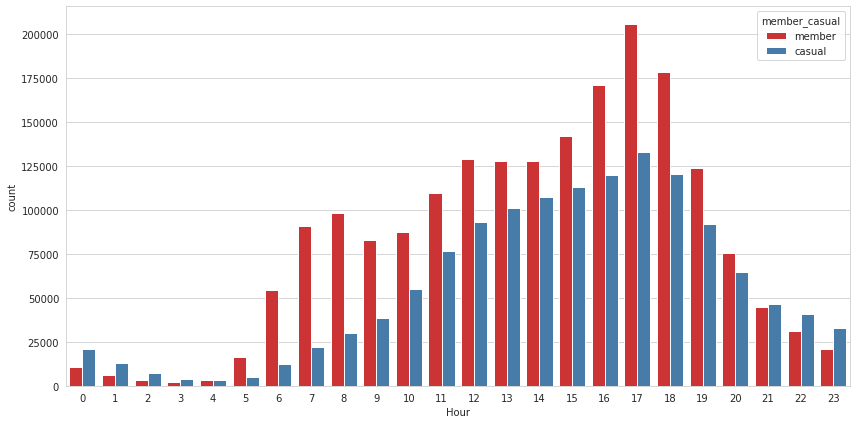

In [47]:
plt.figure(figsize=(12,6))
sns.countplot(x='Hour', hue='member_casual', data=bike_share, palette='Set1')
plt.tight_layout()

* Evening hours see a lot of traffic compared to other timings. This is largly because of office timings of member riders. Casual member also find evening hours productive to go for a ride.

* Morning hours are again busy for member riders due to working hours. Casual members are using bikes for rides at late night somewhere around 9-11 PM.



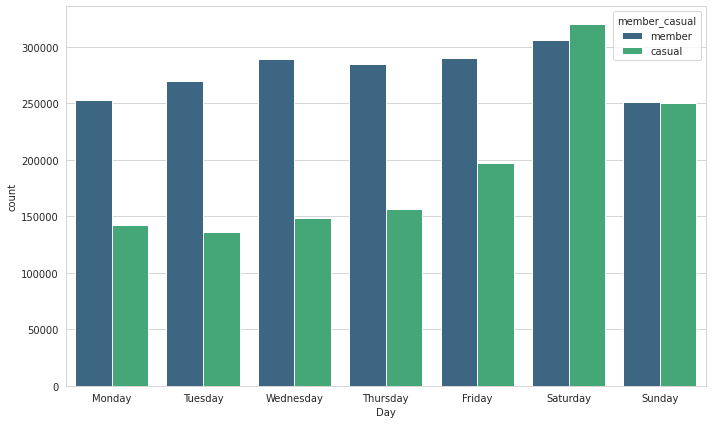

In [48]:
plt.figure(figsize=(10,6))
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(x='Day', hue='member_casual', data=bike_share, palette='viridis', order=order)
plt.tight_layout()

* Casual riders are enthuasiatic on weekends as they have the highest bike usage on Saturday and  Sunday.

* Member riders have consistent use of bikes on weekdays.

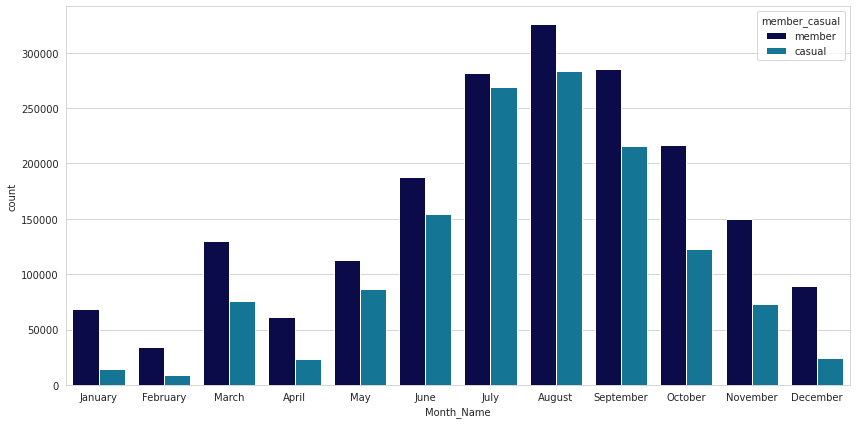

In [49]:
plt.figure(figsize=(12,6))
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December']
sns.countplot(x='Month_Name', hue='member_casual', data=bike_share, palette='ocean', order=order)
plt.tight_layout()

* The summer months show the highest usage of bikes. This can be a starting point for preparing business strategy.

# Insights:

* The bike usage trend **highlightes the purpose** for which the bikes are used.

* **Member riders** have annual memberships because their **frequency of bike usage is higher**. They use it for **daily commute of shorter distance**.

* **Casual riders** more often use bikes **for leisure or personal activities**. **Their usage is higher on weekends.**

* **Summer months are more popular** and business can focus on this period to maximise its profit.

* **Special 'Summer Membership' can be introduced** specifically for casual riders who're hesitant to go for annual membership.

* **Coupons, Discounts schemes can be introduced** for casual riders to **increase their bike usage on weekdays or small distance journeys.**

* It is important for business **to develop the idea of using bikes regulary than just for leisure activities in casual riders.**
